In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay
import xgboost as xgbplot

### Datos
Cargamos `../data/cleaned_data.csv` generado en EDA. Este archivo contiene:
- 17 _features_ (7 numéricas originales + 10 _dummies_)
- 1 columna objetivo `condition` (1 = nuevo, 0 = usado).

In [3]:
df = pd.read_csv('../data/cleaned_data.csv')
X = df.drop('condition', axis=1)
y = df['condition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


### Por qué 70/30 y `stratify`
- 70 % proporciona suficiente información para entrenar modelos.
- 30 % entrega un test grande (≈ 30 000 filas).
- `stratify=y` mantiene la proporción nuevo/usado (≈ 54/46) en ambos conjuntos

### Entrenamos 4 modelos:

+ Logistic Regression

+ Random Forest

+ XGBoost

+ Decision Tree



In [17]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
p_lr = lr.predict(X_test)
pr_lr = lr.predict_proba(X_test)[:, 1]
print('LR\nAUC:', roc_auc_score(y_test, pr_lr),
      '\naccuracy:', accuracy_score(y_test, p_lr),
      '\nprecisión:', precision_score(y_test, p_lr),
      '\nF1:', f1_score(y_test, p_lr),
      '\nRecall:', recall_score(y_test, p_lr))


LR
AUC: 0.8584590789845848 
accuracy: 0.7073 
precisión: 0.8566825441300084 
F1: 0.5820760553995526 
Recall: 0.4407842571902256


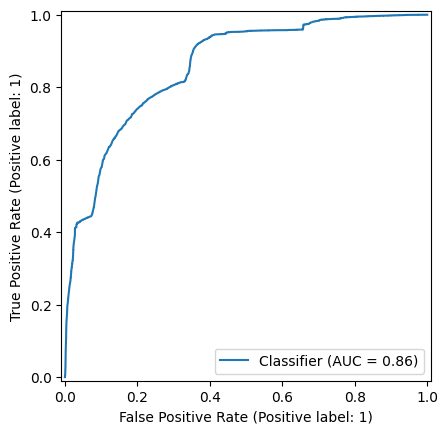

In [26]:
RocCurveDisplay.from_predictions(y_test, pr_lr)
plt.show()

In [19]:
rf = RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
p_rf = rf.predict(X_test)
pr_rf = rf.predict_proba(X_test)[:, 1]
print('RF\nAUC:', roc_auc_score(y_test, pr_rf),
      '\naccuracy:', accuracy_score(y_test, p_rf),
      '\nprecisión:', precision_score(y_test, p_rf),
      '\nF1:', f1_score(y_test, p_rf),
      '\nRecall:', recall_score(y_test, p_rf))


RF
AUC: 0.9046339391131192 
accuracy: 0.8261 
precisión: 0.780674448767834 
F1: 0.8219028436827911 
Recall: 0.8677286816117639


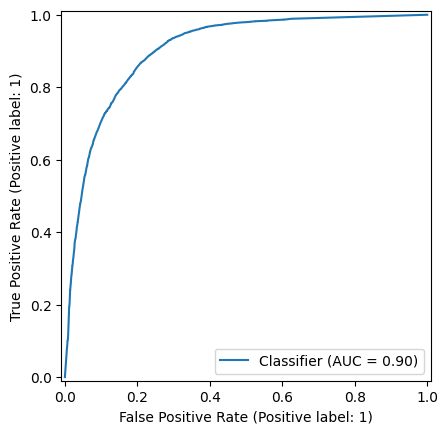

In [27]:
RocCurveDisplay.from_predictions(y_test, pr_rf)
plt.show()

In [21]:
xgb = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=6,
                    subsample=0.8, colsample_bytree=0.8,
                    objective='binary:logistic', eval_metric='auc',
                    n_jobs=-1, random_state=42)
xgb.fit(X_train, y_train)
p_xgb = xgb.predict(X_test)
pr_xgb = xgb.predict_proba(X_test)[:, 1]
print('XGB\nAUC:', roc_auc_score(y_test, pr_xgb),
      '\naccuracy:', accuracy_score(y_test, p_xgb),
      '\nprecisión:', precision_score(y_test, p_xgb),
      '\nF1:', f1_score(y_test, p_xgb),
      '\nRecall:', recall_score(y_test, p_xgb))


XGB
AUC: 0.9160746912512188 
accuracy: 0.8319333333333333 
precisión: 0.8121597737716507 
F1: 0.820044257263188 
Recall: 0.8280833273264615


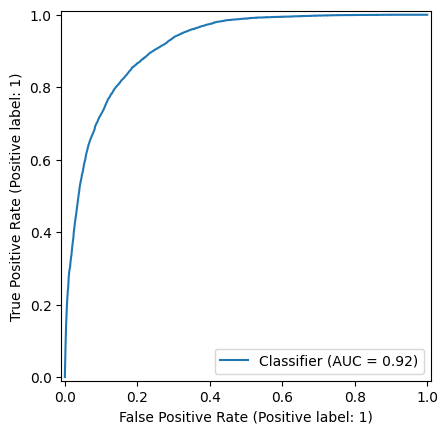

In [28]:
RocCurveDisplay.from_predictions(y_test, pr_xgb)
plt.show()

In [24]:
dt = DecisionTreeClassifier(max_depth=None, random_state=42)
dt.fit(X_train, y_train)
p_dt = dt.predict(X_test)
pr_dt = dt.predict_proba(X_test)[:, 1]

print('DT\nAUC:', roc_auc_score(y_test, pr_dt),
      '\naccuracy:', accuracy_score(y_test, p_dt),
      '\nprecisión:', precision_score(y_test, p_dt),
      '\nF1:', f1_score(y_test, p_dt),
      '\nRecall:', recall_score(y_test, p_dt))


DT
AUC: 0.8794574998883362 
accuracy: 0.8231666666666667 
precisión: 0.7804399057344855 
F1: 0.8180040481663179 
Recall: 0.8593671159806819


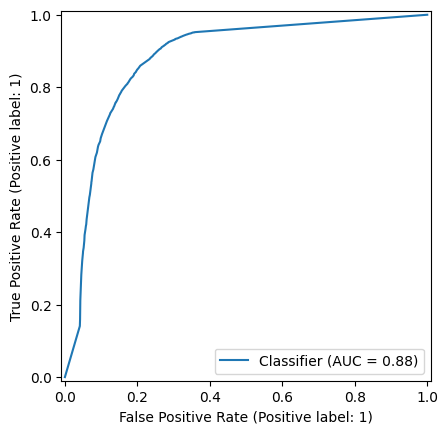

In [29]:
RocCurveDisplay.from_predictions(y_test, pr_dt)
plt.show()

### Métricas reportadas
- **AUC**: calidad global de ranking (independiente de umbral).
- **Accuracy**: proporción total de aciertos con umbral 0.5.
- **Precisión**: confianza en predicciones.
- **Recall**: cobertura de los verdaderos.
- **F1**: compromiso precisión-recall.

### Criterio de selección
Elegimos el mejor modelo por **AUC** primero y corroboramos que no sacrifique el compromiso **F1**. Para este caso ganó **XGBoost**.

In [ ]:
df_vis = X_test.copy()
df_vis['real'] = y_test.values
df_vis['pred'] = p_xgb
df_vis['prob_new'] = pr_xgb
df_vis.head(20)


,price,initial_quantity,sold_quantity,available_quantity,automatic_relist,shipping_local_pick_up,shipping_free,listing_type_id_bronze,listing_type_id_free,listing_type_id_gold,listing_type_id_gold_premium,listing_type_id_gold_pro,listing_type_id_gold_special,listing_type_id_silver,buying_mode_auction,buying_mode_buy_it_now,buying_mode_classified,real,pred,prob_new
2630,18500.00,1,1,1,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0.289504
82558,300.00,1,0,1,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0.558506
44909,330.00,1,0,1,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.879607
21767,135.00,1,0,1,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.945406
71786,179.99,10,0,10,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.015266
30679,30.00,999,0,999,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.001198
26877,4800.00,1,0,1,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0.277343
49032,636.07,10,0,10,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.000337
33820,2299.00,1,0,1,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0.349455
38706,4000.00,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0.393932


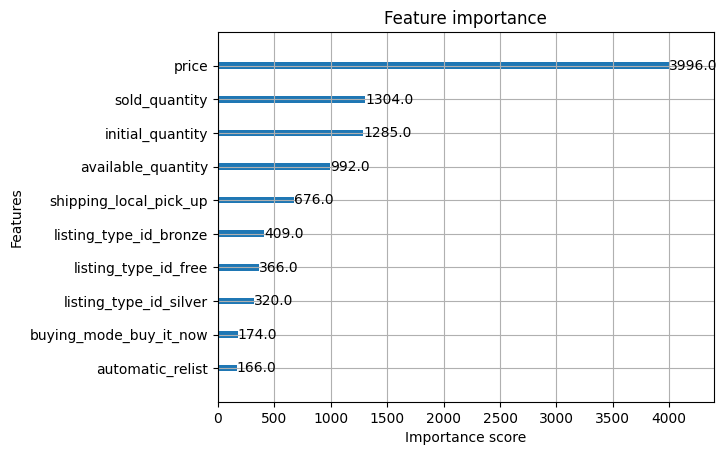

In [38]:
xgbplot.plot_importance(xgb, max_num_features=10)
plt.show()